In [125]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

### 1. Given a periodic sequence x[n] with period N samples, state and write the Fourier Analysis equations which can be applied to it to represent it in the frequency domain?

In [126]:
from IPython.display import display, Math

# Define the DFS equations in LaTeX format
synthesis_eq = r'x[n] = \frac{1}{N} \sum_{k=0}^{N-1} X[k] e^{j\frac{2\pi nk}{N}}'
analysis_eq = r'X[k] = \sum_{n=0}^{N-1} x[n] e^{-j\frac{2\pi nk}{N}}'

# Render the equations using MathJax
print("Analysis")
display(Math(analysis_eq))
print("Synthesis")
display(Math(synthesis_eq))


Analysis


<IPython.core.display.Math object>

Synthesis


<IPython.core.display.Math object>

### 2. Develop your own python routine to generate the forward and inverse DTFS (Discrete Time Fourier Series) and DFT (Discrete Fourier Transform) representation of a given periodic sequence x[n]. Your routine should have prototypes as follows:

Xdtfs[k] = myDTFS(ipX, N)

X_Idtfs = myIDTFS(Xdtfs)

Xdft[k] = myDFT(ipX, N)

X_Idft = myIDFT(Xdft)

where ipX is a real vector representing a single period of a periodic sequence, and N the length of Fourier Transform. See scipy.fftpack.fft for description. Compare your results to scipy.fftpack.fft

In [127]:
def myDTFS(x,N):
    X = np.zeros(len(x), dtype=complex)
    Omega = np.zeros(len(x))
    N = len(x)
    for k in np.arange(0,len(x)):
        tmpVal = 0.0
        Omega[k] = (2*np.pi/N)*k
        for n in np.arange(0,len(x)):
            tmpVal = tmpVal + x[n]*np.exp(-1j*(2*np.pi/N)*k*n)
        X[k] = tmpVal/N
    return (X,Omega)

def myIDTFS(X):
    x = np.zeros(len(X), dtype=float)
    N = len(x)
    for n in np.arange(0,len(x)):
        tmpVal = 0.0
        for k in np.arange(0,len(X)):
            tmpVal = tmpVal + X[k]*np.exp(+1j*(2*np.pi/N)*k*n)
        x[n] = np.absolute(tmpVal)
    return (x)


def myDFT(x,N):
    X = np.zeros(len(x), dtype=complex)
    Omega = np.zeros(len(x))
    N = len(x)
    for k in np.arange(0,len(x)):
        tmpVal = 0.0
        Omega[k] = (2*np.pi/N)*k
        for n in np.arange(0,len(x)):
            tmpVal = tmpVal + x[n]*np.exp(-1j*(2*np.pi/N)*k*n)
        X[k] = tmpVal
    return (X,Omega)

def myIDFT(X):
    x = np.zeros(len(X), dtype=float)
    N = len(x)
    for n in np.arange(0,len(x)):
        tmpVal = 0.0
        for k in np.arange(0,len(X)):
            tmpVal = tmpVal + X[k]*np.exp(+1j*(2*np.pi/N)*k*n)
        x[n] = np.absolute(tmpVal)/N
    return (x)

def plotMagPhase(x,rad):
    f, axarr = plt.subplots(2, sharex=True)
    x = np.absolute(x)
    axarr[0].stem(np.arange(0,len(x)), x)
    axarr[0].set_ylabel('mag value')
    axarr[1].stem(np.arange(0,len(rad)), rad)
    axarr[1].set_ylabel('Phase (rad)')
    plt.show()

a. How is myDTFS different to myDFT?

##### Ans: myDTFS computes the Discrete Time Fourier Series (DTFS) coefficients of a given periodic sequence while myDFT computes the Discrete Fourier Transform (DFT) coefficients of a finite-length sequence.

b. Find Xdtfs[k] and Xdft[k] for ipX = [1,1,0,0,0,0,0,0,0,0,0,0]. Plot the magnitude and phase representations for the found Fourier analysis values. Clearly label the xaxis values and interpret the corresponding 𝜔 (radian/sample) value for each k.

In [128]:
def q2b():
    ipX = [1,1,0,0,0,0,0,0,0,0,0,0]
    (X1, W1) = myDTFS(ipX,len(ipX))
    (X2, W2) = myDFT(ipX,len(ipX))
    (Xf1) = np.fft.fft(ipX)
    angleX = np.angle(Xf1)

    print("DTFS")
    plotMagPhase(X1, angleX)
    print("DFT")
    plotMagPhase(X2, angleX)

    for i in range(len(W1)):
        print("K =", str(i), "w =", W1[i])
    return(X1, X2)

DTFS


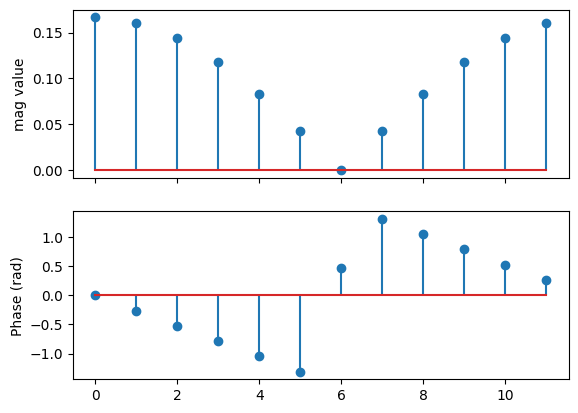

DFT


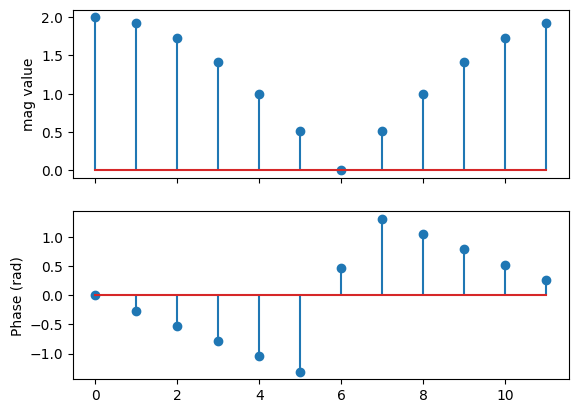

K = 0 w = 0.0
K = 1 w = 0.5235987755982988
K = 2 w = 1.0471975511965976
K = 3 w = 1.5707963267948966
K = 4 w = 2.0943951023931953
K = 5 w = 2.617993877991494
K = 6 w = 3.141592653589793
K = 7 w = 3.665191429188092
K = 8 w = 4.1887902047863905
K = 9 w = 4.71238898038469
K = 10 w = 5.235987755982988
K = 11 w = 5.759586531581287


In [129]:
X1, X2 =q2b()

c. Show that your myIDTFS and myIDFT will generate the given ipX from the evaluated Xdtfs and Xdft coefficients found.

In [130]:
def q2c(X1, X2):
    x1 = myIDTFS(X1)
    x2 = myIDFT(X2)
    print(np.round(x1,5))
    print(np.round(x2,5))
   

In [131]:
q2c(X1, X2)

[1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


d. Evaluate

i) Xdtfs2[k] of ipX2 = [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

ii) Xdtfs3[k] of ipX3 = [10, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Compare the magnitude and frequency spectral to Q2b. What are the differences?
Hint 
i) is a time shifted version of 

Q2b. 

ii) is an amplified version of Q2b.

In [132]:
def q2d():
    x2=[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    x3=[10, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    (X2, W2) = myDTFS(x2,len(x2))
    (X3, W3) = myDTFS(x3,len(x3))
    Xf2 = np.fft.fft(x2)
    Xf3 = np.fft.fft(x3)
    Xang2 = np.angle(Xf2)
    Xang3 = np.angle(Xf3)
    print("X2")
    plotMagPhase(X2, Xang2)
    # In X2, Amplitude is same, with phase difference
    print("X3")
    plotMagPhase(X3, Xang3)
    # In X3, Phase is same, with amplitude scaled

X2


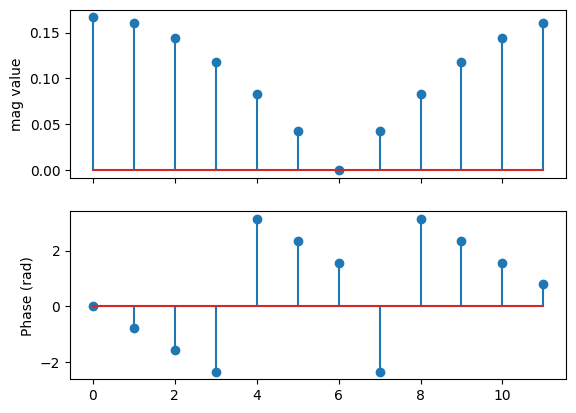

X3


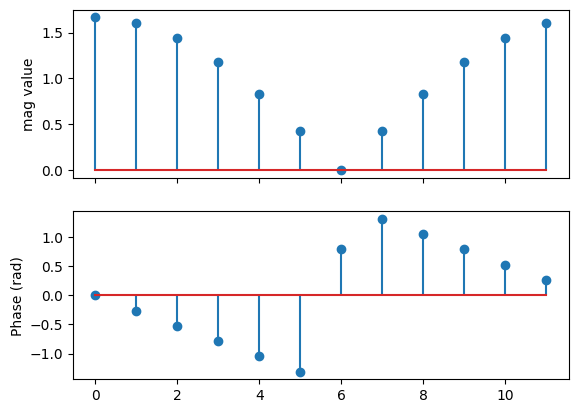

In [133]:
q2d()

### 3. Write the DFT forward analysis using matrix notations. Each row of the analysis matrix W has a particular meaning. Plot the phase of each element of W for each row. Hence suggest the characteristic of each row. Hint‐ it is related to the index k.

In [134]:
def plotK(W):
    f, axarr = plt.subplots()
    phaseW = np.angle(W)
    print(phaseW)
    axarr.stem(np.arange(0,len(phaseW)),phaseW)
    plt.show()
    print("\n\n\n")

In [135]:
def myMatrixDFT(x):
    N = len(x)
    X = np.zeros(len(x), dtype=complex)
    Omega = np.zeros(N)
    rows, cols = (N, N) 
    print(rows,cols)
    W = [[0 for i in range(cols)] for j in range(rows)] 
    for k in range(N):
        for n in range(N):
            W[k][n] = round(np.exp(-1j*2*np.pi*k*n/N),3)
    X = np.matmul(W, x)
    
    for i in range(len(W)):
        print("k = ", str(i))
        plotK(W[i])
    
    for k in np.arange(0,len(x)):
        Omega[k] = (2*np.pi/N)*k

    return (X,Omega)

12 12
k =  0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


C:\Users\chock\AppData\Local\Temp\ipykernel_7588\3756705505.py:10: DeprecationWarning: The Python built-in `round` is deprecated for complex scalars, and will raise a `TypeError` in a future release. Use `np.round` or `scalar.round` instead.
  W[k][n] = round(np.exp(-1j*2*np.pi*k*n/N),3)


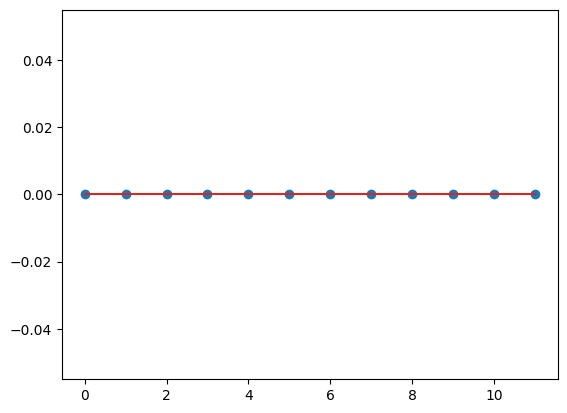





k =  1
[ 0.         -0.52361148 -1.04718485 -1.57079633 -2.0944078  -2.61798118
 -3.14159265  2.61798118  2.0944078   1.57079633  1.04718485  0.52361148]


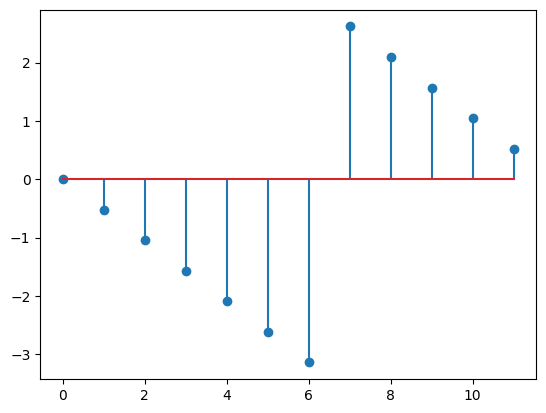





k =  2
[ 0.         -1.04718485 -2.0944078  -3.14159265  2.0944078   1.04718485
  0.         -1.04718485 -2.0944078  -3.14159265  2.0944078   1.04718485]


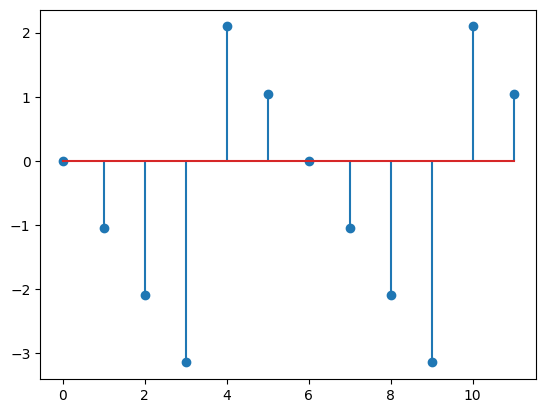





k =  3
[ 0.         -1.57079633 -3.14159265  1.57079633  0.         -1.57079633
 -3.14159265  1.57079633  0.         -1.57079633 -3.14159265  1.57079633]


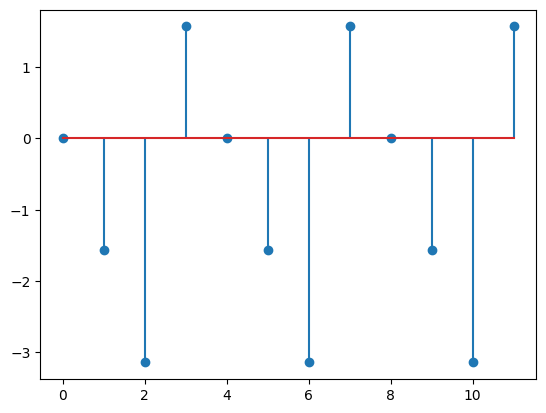





k =  4
[ 0.        -2.0944078  2.0944078  0.        -2.0944078  2.0944078
  0.        -2.0944078  2.0944078  0.        -2.0944078  2.0944078]


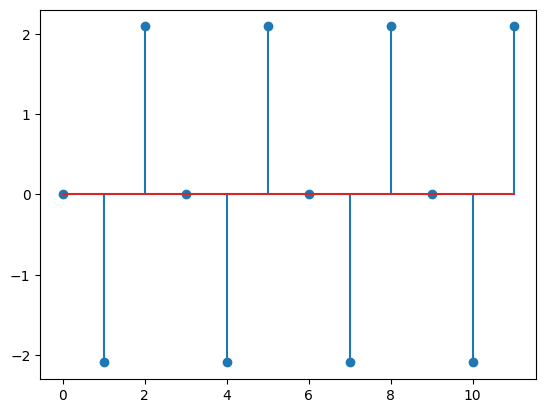





k =  5
[ 0.         -2.61798118  1.04718485 -1.57079633  2.0944078  -0.52361148
 -3.14159265  0.52361148 -2.0944078   1.57079633 -1.04718485  2.61798118]


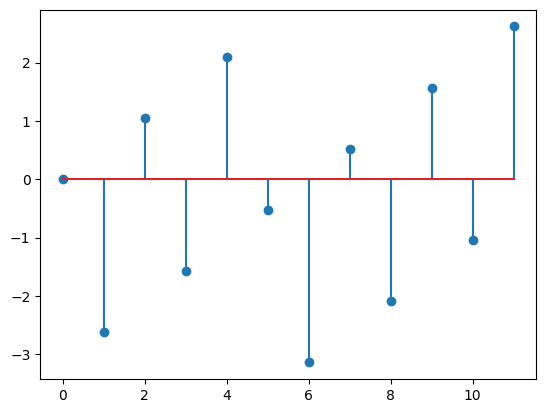





k =  6
[ 0.         -3.14159265  0.         -3.14159265  0.         -3.14159265
  0.         -3.14159265  0.         -3.14159265  0.          3.14159265]


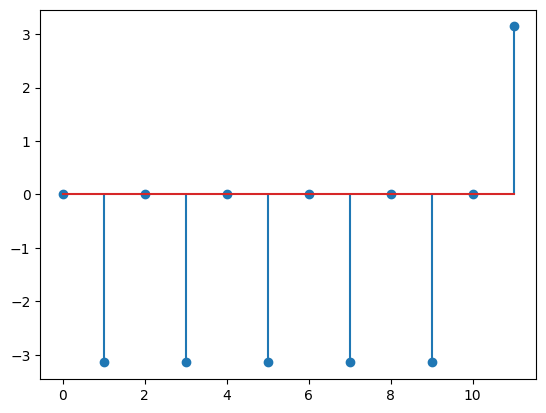





k =  7
[ 0.          2.61798118 -1.04718485  1.57079633 -2.0944078   0.52361148
 -3.14159265 -0.52361148  2.0944078  -1.57079633  1.04718485 -2.61798118]


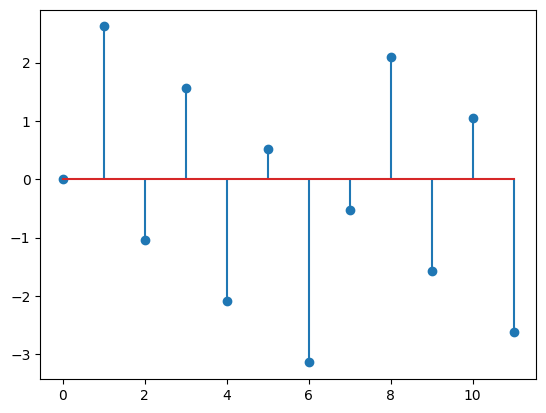





k =  8
[ 0.         2.0944078 -2.0944078  0.         2.0944078 -2.0944078
  0.         2.0944078 -2.0944078  0.         2.0944078 -2.0944078]


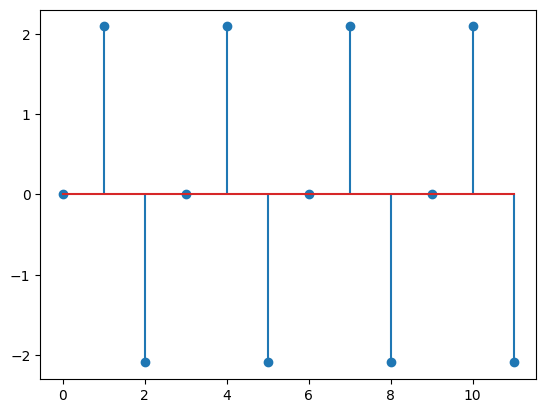





k =  9
[ 0.          1.57079633 -3.14159265 -1.57079633  0.          1.57079633
 -3.14159265 -1.57079633  0.          1.57079633  3.14159265 -1.57079633]


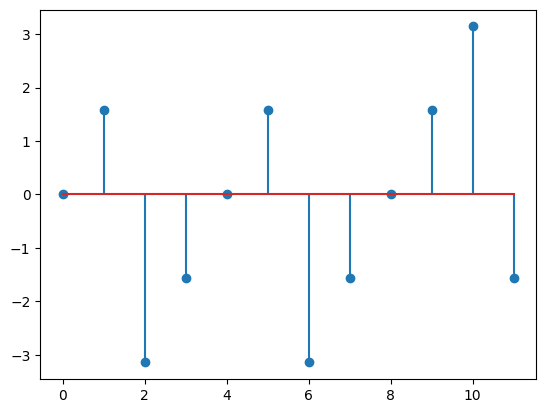





k =  10
[ 0.          1.04718485  2.0944078  -3.14159265 -2.0944078  -1.04718485
  0.          1.04718485  2.0944078   3.14159265 -2.0944078  -1.04718485]


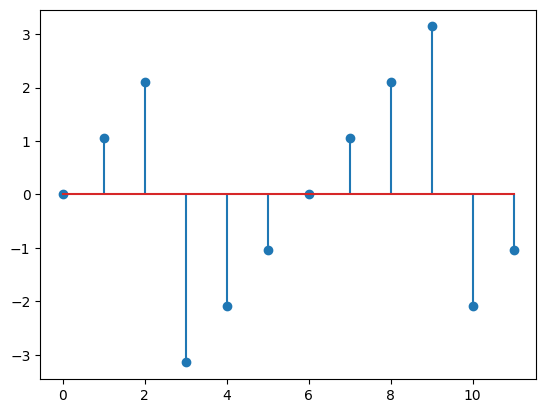





k =  11
[ 0.          0.52361148  1.04718485  1.57079633  2.0944078   2.61798118
 -3.14159265 -2.61798118 -2.0944078  -1.57079633 -1.04718485 -0.52361148]


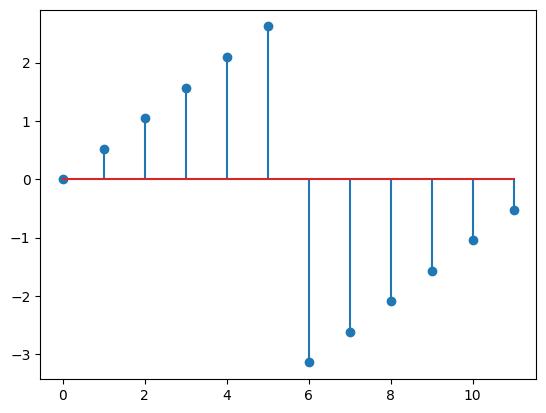

In [136]:
def q3():
    x=[1,1,0,0,0,0,0,0,0,0,0,0]
    X4, W4 =myMatrixDFT(x)
    Xf4=np.fft.fft(x)
    Xang4 = np.angle(Xf4)

q3()

In [137]:
#     Each row is 2*pi*k divided by N; for k = 1 to 5, The phase goes around k times faster compared to k=1. 
#     For k=7 to 11, they are conjugate of k = 5 to 1 (i.e. 1 = conjugate(11), 2 = conjugate(10) etc), 
#     hence the phase is flipped

### 4. It is not possible to computationally realise the DTFT solution of a discrete sequence. E.g, if the ipX sequence is aperiodic, ipX = [1,1,1,1,1,1,1,0,0,0,0,0,0,0,….],
a. Explain why it is not possible to write a routine to analyse it. Hint: we can only generate a sampled version of DTFT.

b. Truncate ipX sequence to have different lengths, e.g, N = 12, 24,48,96. Apply DTFS on the truncated ipX. Plot the resultant Fourier magnitude coefficients with respect to x-axis being k (integers) as well as 𝜔. Hence interpret the relationship between DTFS to DTFT.

In [138]:
def plotMagnitute_DTFS_DTFT(X,Omega):
    N=len(X)
    
    absX = np.absolute(X)
    titleStr = 'x[n]'
    f, axarr = plt.subplots(figsize=(18, 2.5))
    angleX = np.angle(X)
    
    axarr.stem(np.arange(0,N), absX)
    axarr.set_title('DTFS '+titleStr)
    axarr.set_ylabel('mag value')
    plt.show()
    
    f, axarr = plt.subplots(figsize=(18, 2.5))
    axarr.stem(np.arange(0,N), angleX)
    axarr.set_xlabel('omega*pi (rad/sample)')
    axarr.set_ylabel('Phase (rad)')
    ticks = range(N)
    ticks = [round(element * 2/N,2) for element in ticks]
    plt.xticks(np.arange(0,N), ticks)
    plt.xlabel('w*pi (rad/sample) ')
    plt.show()
    

In [139]:
#q4a: Because the result of DTFT is continuous where N approaches infinity. We can't have an infinite-sized list

In [140]:
def q4b():
    NList = [12, 24, 48, 96]
    for N in NList:
        print("N =", str(N))
        input_ipX = np.zeros(N)
        input_ipX[0:7]=1
        (x4b,w5b) = myDTFS(input_ipX,len(input_ipX))
        #print(x4b)
        #print(w5b)
        plotMagnitute_DTFS_DTFT(x4b,w5b)
        
        
# As we can see from the plots, as N increases, the DTFS coefficients become more and more closely spaced in frequency. 
# In the limit as N approaches infinity, the DTFS coefficients approach the values of the DTFT. 
# Therefore, the DTFS is a sampled version of the DTFT, 
# and it provides a good approximation of the DTFT for sufficiently large N.

N = 12


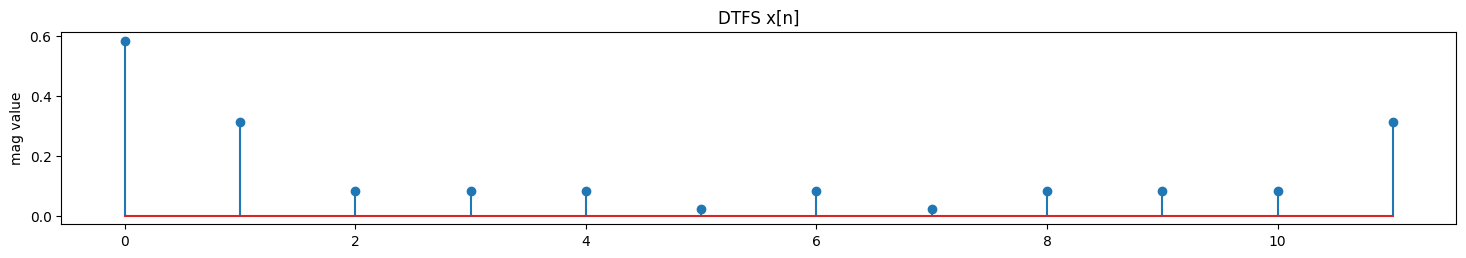

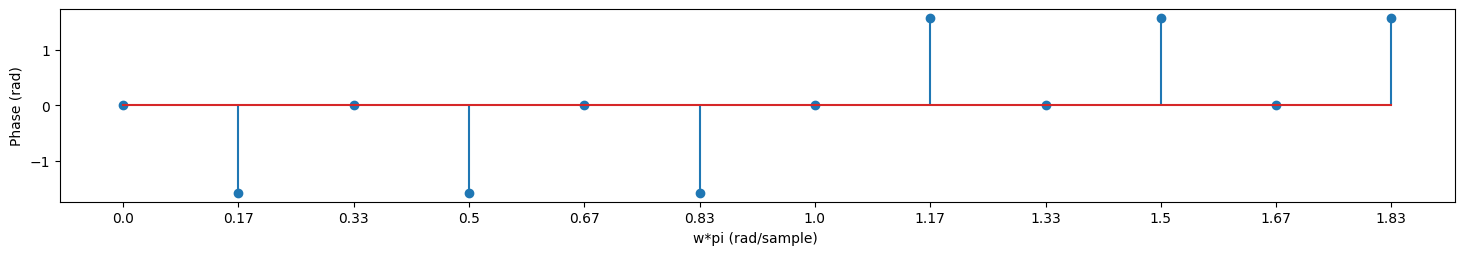

N = 24


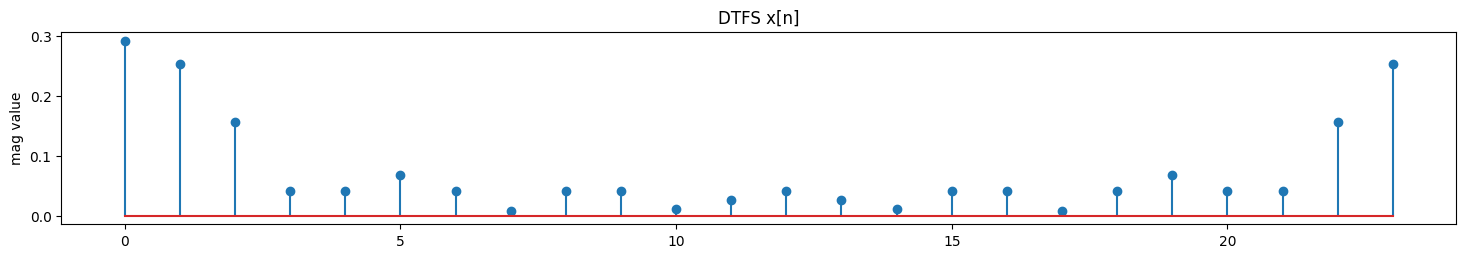

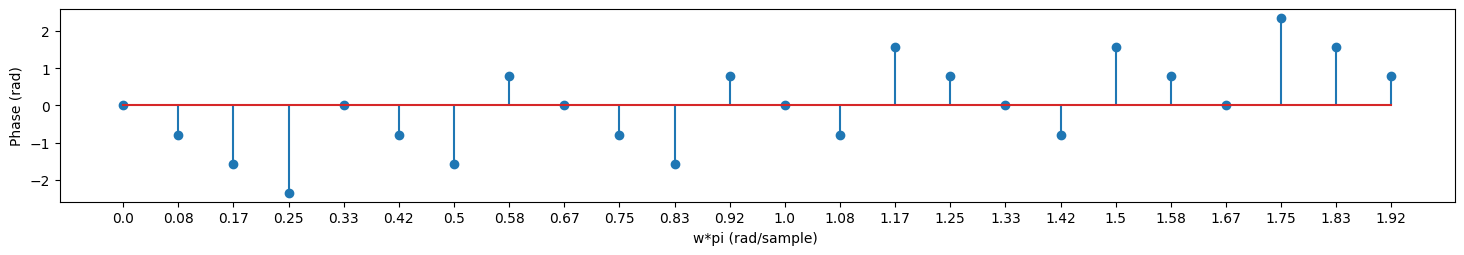

N = 48


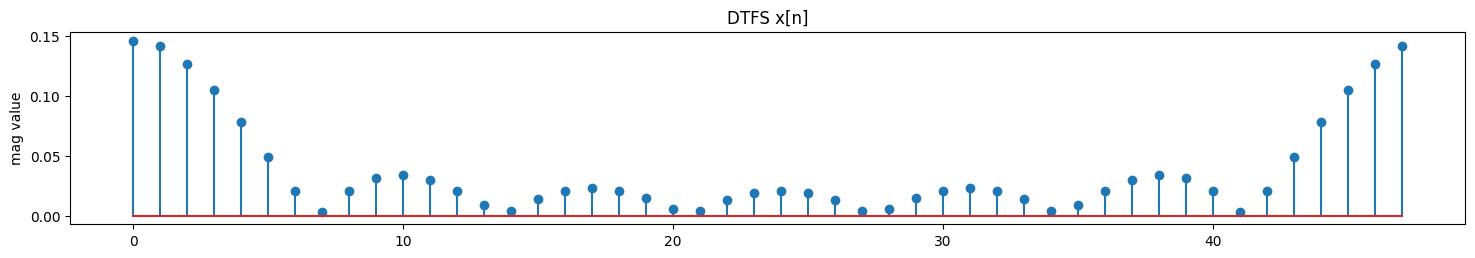

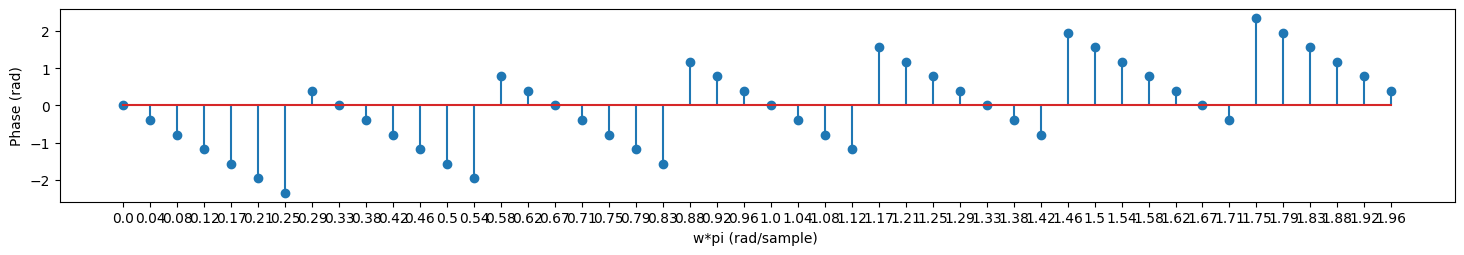

N = 96


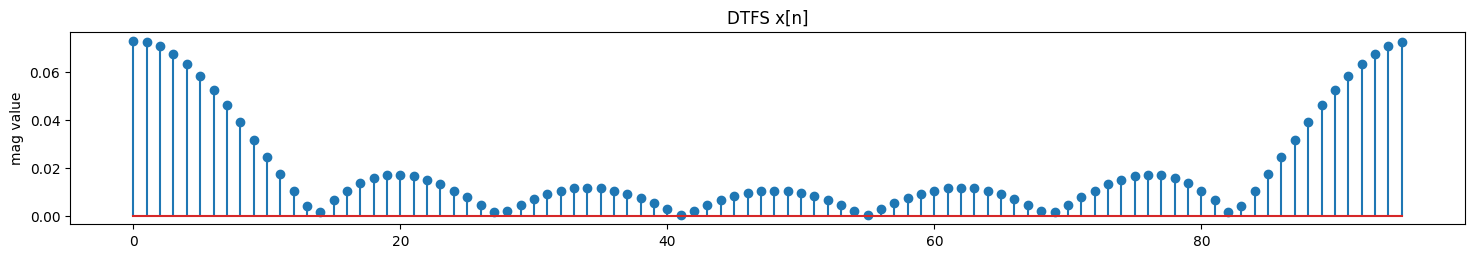

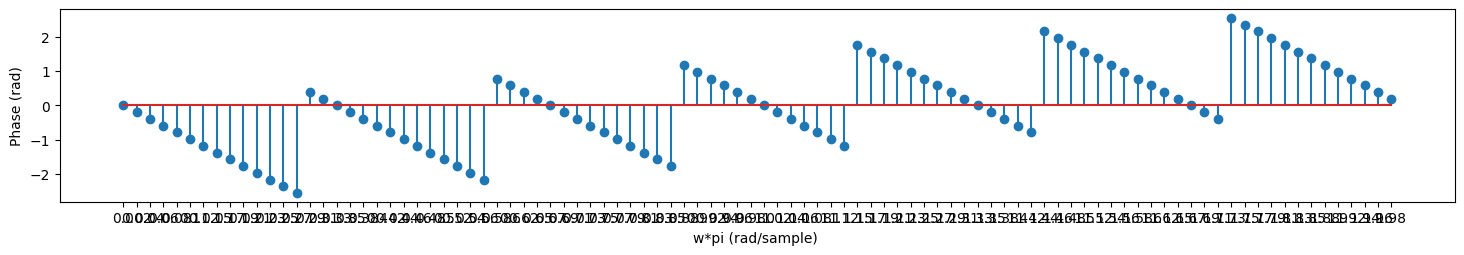

In [141]:
q4b()

### 5. Write your own routine to perform convolution of two sequences in Fourier domain.
y = myDFTConvolve (ipX,impulseH)

Compare your results using scipy fftconvolve [1], as well as your convolution routine developed in Lab 2. Note – you should assume that the length of ipX and impulse are different, hence you will need to take care of zero padding.

In [142]:
def myDFTConvolve(x,h):
    N = len(x)
    M = len(h)
    y = np.zeros(N+M-1)
    for n in range(N+M-1):
        for k in range(M):
            if n-k >= 0 and n-k < N:
                y[n] += x[n-k] * h[k]
    return np.array(y).astype(int)

In [147]:
def q5():
    x = [1,1,1,0,0,0,0,0,0]
    h = [1,1,0,0]
    print("myDFTConvolve:")
    y = myDFTConvolve(x,h)
    print(y)
    print("Scipy fftconvolve:")
    print(np.round(signal.fftconvolve(x,h),5))

In [148]:
q5()

myDFTConvolve:
[1 2 2 1 0 0 0 0 0 0 0 0]
Scipy fftconvolve:
[1. 2. 2. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
